In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
dataset = pd.read_csv("heart.csv")

In [7]:
dataset.head()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,1.0,1
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,2.0,0
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,0.0,0
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,2.0,1
4,41,0,1,130,204,0,2,172,0,1.4,1,0.0,2.0,1


In [8]:
list1 = dataset.columns

In [9]:
list1

Index(['age', 'sex', 'cp', 'trestbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'AHD'],
      dtype='object')

In [11]:
for i in list1:
    mean_value = dataset[i].mean()
    dataset[i].fillna(value = mean_value, inplace=True)

In [13]:
dataset.isnull().sum()

age        0
sex        0
cp         0
trestbp    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
AHD        0
dtype: int64

In [14]:
X = dataset.iloc[:,:-1]
y = dataset['AHD']

In [15]:
X.head()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,1.0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,2.0
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,0.0
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,2.0
4,41,0,1,130,204,0,2,172,0,1.4,1,0.0,2.0


In [16]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: AHD, dtype: int64

In [17]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [18]:
X_train

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,65,1,3,138,282,1,2,174,0,1.4,2,1.0,2.0
72,62,1,0,120,267,0,0,99,1,1.8,2,2.0,0.0
15,57,1,2,150,168,0,0,174,0,1.6,1,0.0,2.0
10,57,1,0,140,192,0,0,148,0,0.4,2,0.0,1.0
163,58,0,0,100,248,0,2,122,0,1.0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,1,192,283,0,2,195,0,0.0,1,1.0,0.0
71,67,1,0,125,254,1,0,163,0,0.2,2,2.0,0.0
106,59,1,0,140,177,0,0,162,1,0.0,1,1.0,0.0
270,61,1,0,140,207,0,2,138,1,1.9,1,1.0,0.0


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [22]:
classifier = Sequential()

In [23]:
classifier.add(Dense(units = 13, activation = 'relu'))
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [27]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [29]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
15/15 [==============================] - 5s 116ms/step - loss: 34.3676 - accuracy: 0.4648 - val_loss: 28.6248 - val_accuracy: 0.4286
Epoch 2/1000
15/15 [==============================] - 0s 10ms/step - loss: 22.5482 - accuracy: 0.4648 - val_loss: 16.2119 - val_accuracy: 0.4286
Epoch 3/1000
15/15 [==============================] - 0s 9ms/step - loss: 11.2991 - accuracy: 0.4366 - val_loss: 5.7107 - val_accuracy: 0.4571
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 3.8526 - accuracy: 0.4577 - val_loss: 1.7237 - val_accuracy: 0.5143
Epoch 5/1000
15/15 [==============================] - 0s 8ms/step - loss: 1.6210 - accuracy: 0.5070 - val_loss: 0.9828 - val_accuracy: 0.6571
Epoch 6/1000
15/15 [==============================] - 0s 10ms/step - loss: 1.1480 - accuracy: 0.5634 - val_loss: 0.8035 - val_accuracy: 0.6857
Epoch 7/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.9153 - accuracy: 0.5493 - val_loss: 0.7019 - val_accuracy: 0.7

15/15 [==============================] - 0s 10ms/step - loss: 0.6673 - accuracy: 0.5634 - val_loss: 0.6768 - val_accuracy: 0.6143
Epoch 59/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6665 - accuracy: 0.5634 - val_loss: 0.6771 - val_accuracy: 0.6143
Epoch 60/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6686 - accuracy: 0.5634 - val_loss: 0.6768 - val_accuracy: 0.6143
Epoch 61/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6663 - accuracy: 0.5704 - val_loss: 0.6791 - val_accuracy: 0.6143
Epoch 62/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6686 - accuracy: 0.5704 - val_loss: 0.6754 - val_accuracy: 0.6000
Epoch 63/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6666 - accuracy: 0.5704 - val_loss: 0.6754 - val_accuracy: 0.6143
Epoch 64/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.6695 - accuracy: 0.5775 - val_loss: 0.6793 - val_accuracy: 0.6143
Epoch 65/

15/15 [==============================] - 0s 7ms/step - loss: 0.6551 - accuracy: 0.5915 - val_loss: 0.6648 - val_accuracy: 0.6143
Epoch 116/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6599 - accuracy: 0.5845 - val_loss: 0.6682 - val_accuracy: 0.6286
Epoch 117/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6583 - accuracy: 0.5775 - val_loss: 0.6625 - val_accuracy: 0.6143
Epoch 118/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6607 - accuracy: 0.5915 - val_loss: 0.6665 - val_accuracy: 0.6286
Epoch 119/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6643 - accuracy: 0.5704 - val_loss: 0.6615 - val_accuracy: 0.6143
Epoch 120/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6581 - accuracy: 0.5845 - val_loss: 0.6640 - val_accuracy: 0.6143
Epoch 121/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6559 - accuracy: 0.5775 - val_loss: 0.6646 - val_accuracy: 0.6286
Epoch 1

Epoch 172/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6415 - accuracy: 0.6127 - val_loss: 0.6556 - val_accuracy: 0.7286
Epoch 173/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6631 - accuracy: 0.5775 - val_loss: 0.6498 - val_accuracy: 0.6143
Epoch 174/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6661 - accuracy: 0.5775 - val_loss: 0.6498 - val_accuracy: 0.6143
Epoch 175/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6552 - accuracy: 0.5915 - val_loss: 0.6470 - val_accuracy: 0.6429
Epoch 176/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6496 - accuracy: 0.5915 - val_loss: 0.6464 - val_accuracy: 0.6429
Epoch 177/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6470 - accuracy: 0.5915 - val_loss: 0.6474 - val_accuracy: 0.6429
Epoch 178/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6474 - accuracy: 0.5915 - val_loss: 0.6482 - val_accuracy:

Epoch 229/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6433 - accuracy: 0.5915 - val_loss: 0.6388 - val_accuracy: 0.6429
Epoch 230/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6436 - accuracy: 0.5915 - val_loss: 0.6383 - val_accuracy: 0.6571
Epoch 231/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.6409 - accuracy: 0.6056 - val_loss: 0.6384 - val_accuracy: 0.6571
Epoch 232/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6429 - accuracy: 0.5986 - val_loss: 0.6409 - val_accuracy: 0.6571
Epoch 233/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6436 - accuracy: 0.5915 - val_loss: 0.6376 - val_accuracy: 0.6429
Epoch 234/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6418 - accuracy: 0.5986 - val_loss: 0.6380 - val_accuracy: 0.6571
Epoch 235/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6516 - accuracy: 0.5986 - val_loss: 0.6386 - val_accurac

Epoch 286/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.6868 - accuracy: 0.5423 - val_loss: 0.6800 - val_accuracy: 0.5857
Epoch 287/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.5423 - val_loss: 0.6796 - val_accuracy: 0.5857
Epoch 288/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6867 - accuracy: 0.5423 - val_loss: 0.6795 - val_accuracy: 0.5857
Epoch 289/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6866 - accuracy: 0.5423 - val_loss: 0.6791 - val_accuracy: 0.5857
Epoch 290/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6866 - accuracy: 0.5423 - val_loss: 0.6789 - val_accuracy: 0.5857
Epoch 291/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6867 - accuracy: 0.5423 - val_loss: 0.6785 - val_accuracy: 0.5857
Epoch 292/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6866 - accuracy: 0.5423 - val_loss: 0.6782 - val_accurac

In [30]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000)

Epoch 1/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.6864 - accuracy: 0.5423 - val_loss: 0.6777 - val_accuracy: 0.5857
Epoch 2/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.6864 - accuracy: 0.5423 - val_loss: 0.6776 - val_accuracy: 0.5857
Epoch 3/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.6863 - accuracy: 0.5423 - val_loss: 0.6774 - val_accuracy: 0.5857
Epoch 4/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6864 - accuracy: 0.5423 - val_loss: 0.6772 - val_accuracy: 0.5857
Epoch 5/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6863 - accuracy: 0.5423 - val_loss: 0.6771 - val_accuracy: 0.5857
Epoch 6/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6862 - accuracy: 0.5423 - val_loss: 0.6770 - val_accuracy: 0.5857
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6862 - accuracy: 0.5423 - val_loss: 0.6768 - val_accuracy: 0.5857
E

15/15 [==============================] - 0s 9ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6749 - val_accuracy: 0.5857
Epoch 59/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6855 - accuracy: 0.5423 - val_loss: 0.6748 - val_accuracy: 0.5857
Epoch 60/1000
15/15 [==============================] - 0s 16ms/step - loss: 0.6855 - accuracy: 0.5423 - val_loss: 0.6748 - val_accuracy: 0.5857
Epoch 61/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6749 - val_accuracy: 0.5857
Epoch 62/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6749 - val_accuracy: 0.5857
Epoch 63/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6748 - val_accuracy: 0.5857
Epoch 64/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6748 - val_accuracy: 0.5857
Epoch 65

15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6744 - val_accuracy: 0.5857
Epoch 116/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6743 - val_accuracy: 0.5857
Epoch 117/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6744 - val_accuracy: 0.5857
Epoch 118/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6743 - val_accuracy: 0.5857
Epoch 119/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6743 - val_accuracy: 0.5857
Epoch 120/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6743 - val_accuracy: 0.5857
Epoch 121/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6743 - val_accuracy: 0.5857
Epoch 1

Epoch 172/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6776 - val_accuracy: 0.5857
Epoch 173/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6774 - val_accuracy: 0.5857
Epoch 174/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6773 - val_accuracy: 0.5857
Epoch 175/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6771 - val_accuracy: 0.5857
Epoch 176/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6770 - val_accuracy: 0.5857
Epoch 177/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6769 - val_accuracy: 0.5857
Epoch 178/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6768 - val_accurac

Epoch 229/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6750 - val_accuracy: 0.5857
Epoch 230/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.5423 - val_loss: 0.6749 - val_accuracy: 0.5857
Epoch 231/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6749 - val_accuracy: 0.5857
Epoch 232/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6748 - val_accuracy: 0.5857
Epoch 233/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6749 - val_accuracy: 0.5857
Epoch 234/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6469 - val_accuracy: 0.6286
Epoch 235/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6451 - accuracy: 0.6056 - val_loss: 0.6362 - val_accurac

Epoch 286/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6823 - val_accuracy: 0.5857
Epoch 287/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6819 - val_accuracy: 0.5857
Epoch 288/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6816 - val_accuracy: 0.5857
Epoch 289/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6813 - val_accuracy: 0.5857
Epoch 290/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6810 - val_accuracy: 0.5857
Epoch 291/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6854 - accuracy: 0.5423 - val_loss: 0.6807 - val_accuracy: 0.5857
Epoch 292/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5423 - val_loss: 0.6805 - val_accuracy:

Epoch 343/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4508 - accuracy: 0.8380 - val_loss: 0.4964 - val_accuracy: 0.8286
Epoch 344/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4522 - accuracy: 0.8310 - val_loss: 0.4893 - val_accuracy: 0.8143
Epoch 345/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4489 - accuracy: 0.8592 - val_loss: 0.4937 - val_accuracy: 0.8286
Epoch 346/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4632 - accuracy: 0.8451 - val_loss: 0.5008 - val_accuracy: 0.8286
Epoch 347/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4408 - accuracy: 0.8451 - val_loss: 0.4890 - val_accuracy: 0.8429
Epoch 348/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4511 - accuracy: 0.8239 - val_loss: 0.4886 - val_accuracy: 0.8286
Epoch 349/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4540 - accuracy: 0.8592 - val_loss: 0.5007 - val_accuracy:

Epoch 400/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3696 - accuracy: 0.8803 - val_loss: 0.4294 - val_accuracy: 0.8286
Epoch 401/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3919 - accuracy: 0.8451 - val_loss: 0.4317 - val_accuracy: 0.8286
Epoch 402/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.3652 - accuracy: 0.8873 - val_loss: 0.4244 - val_accuracy: 0.8286
Epoch 403/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3961 - accuracy: 0.8521 - val_loss: 0.4493 - val_accuracy: 0.8143
Epoch 404/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3762 - accuracy: 0.8732 - val_loss: 0.4225 - val_accuracy: 0.8286
Epoch 405/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3644 - accuracy: 0.8732 - val_loss: 0.4463 - val_accuracy: 0.8000
Epoch 406/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.3892 - accuracy: 0.8451 - val_loss: 0.4309 - val_accurac

Epoch 457/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3433 - accuracy: 0.8662 - val_loss: 0.4213 - val_accuracy: 0.8143
Epoch 458/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3357 - accuracy: 0.8732 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 459/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3544 - accuracy: 0.8662 - val_loss: 0.4129 - val_accuracy: 0.8143
Epoch 460/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3363 - accuracy: 0.8521 - val_loss: 0.4097 - val_accuracy: 0.8286
Epoch 461/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3402 - accuracy: 0.8944 - val_loss: 0.4542 - val_accuracy: 0.8000
Epoch 462/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3668 - accuracy: 0.8451 - val_loss: 0.4159 - val_accuracy: 0.8429
Epoch 463/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3417 - accuracy: 0.8873 - val_loss: 0.5141 - val_accuracy:

Epoch 514/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3163 - accuracy: 0.8944 - val_loss: 0.4244 - val_accuracy: 0.8143
Epoch 515/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3060 - accuracy: 0.8944 - val_loss: 0.4193 - val_accuracy: 0.8286
Epoch 516/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3257 - accuracy: 0.8803 - val_loss: 0.4327 - val_accuracy: 0.8143
Epoch 517/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.8873 - val_loss: 0.4293 - val_accuracy: 0.8143
Epoch 518/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3293 - accuracy: 0.8803 - val_loss: 0.4128 - val_accuracy: 0.8000
Epoch 519/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3041 - accuracy: 0.9014 - val_loss: 0.4273 - val_accuracy: 0.8143
Epoch 520/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3030 - accuracy: 0.9014 - val_loss: 0.4230 - val_accuracy:

Epoch 571/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3312 - accuracy: 0.8803 - val_loss: 0.4249 - val_accuracy: 0.8143
Epoch 572/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2890 - accuracy: 0.8944 - val_loss: 0.4539 - val_accuracy: 0.8000
Epoch 573/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3073 - accuracy: 0.8873 - val_loss: 0.4523 - val_accuracy: 0.8000
Epoch 574/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3176 - accuracy: 0.8873 - val_loss: 0.4570 - val_accuracy: 0.7857
Epoch 575/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3695 - accuracy: 0.8451 - val_loss: 0.4792 - val_accuracy: 0.8143
Epoch 576/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3111 - accuracy: 0.8873 - val_loss: 0.4245 - val_accuracy: 0.8000
Epoch 577/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.3022 - accuracy: 0.9014 - val_loss: 0.4463 - val_accuracy:

Epoch 628/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3039 - accuracy: 0.8873 - val_loss: 0.4220 - val_accuracy: 0.8143
Epoch 629/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.2901 - accuracy: 0.9014 - val_loss: 0.5347 - val_accuracy: 0.8143
Epoch 630/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3230 - accuracy: 0.8803 - val_loss: 0.4252 - val_accuracy: 0.8286
Epoch 631/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2831 - accuracy: 0.9014 - val_loss: 0.4239 - val_accuracy: 0.8286
Epoch 632/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2901 - accuracy: 0.8944 - val_loss: 0.4556 - val_accuracy: 0.8286
Epoch 633/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2844 - accuracy: 0.9014 - val_loss: 0.4245 - val_accuracy: 0.8286
Epoch 634/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.2977 - accuracy: 0.9014 - val_loss: 0.4488 - val_accurac

Epoch 685/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2892 - accuracy: 0.9014 - val_loss: 0.4412 - val_accuracy: 0.8286
Epoch 686/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2861 - accuracy: 0.8944 - val_loss: 0.5579 - val_accuracy: 0.8143
Epoch 687/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.9014 - val_loss: 0.4326 - val_accuracy: 0.8286
Epoch 688/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2867 - accuracy: 0.8873 - val_loss: 0.5548 - val_accuracy: 0.8143
Epoch 689/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2944 - accuracy: 0.8944 - val_loss: 0.4317 - val_accuracy: 0.8000
Epoch 690/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3389 - accuracy: 0.8803 - val_loss: 0.4313 - val_accuracy: 0.8000
Epoch 691/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2834 - accuracy: 0.9014 - val_loss: 0.5783 - val_accuracy:

Epoch 742/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3100 - accuracy: 0.8873 - val_loss: 0.4526 - val_accuracy: 0.8143
Epoch 743/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2737 - accuracy: 0.9014 - val_loss: 0.4320 - val_accuracy: 0.8143
Epoch 744/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2742 - accuracy: 0.9085 - val_loss: 0.4465 - val_accuracy: 0.8143
Epoch 745/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2854 - accuracy: 0.8944 - val_loss: 0.4968 - val_accuracy: 0.8143
Epoch 746/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2849 - accuracy: 0.8944 - val_loss: 0.4513 - val_accuracy: 0.8143
Epoch 747/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3057 - accuracy: 0.8873 - val_loss: 0.4383 - val_accuracy: 0.8286
Epoch 748/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2820 - accuracy: 0.9014 - val_loss: 0.4355 - val_accuracy:

Epoch 799/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2989 - accuracy: 0.8944 - val_loss: 0.4286 - val_accuracy: 0.8429
Epoch 800/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2713 - accuracy: 0.9014 - val_loss: 0.5407 - val_accuracy: 0.8143
Epoch 801/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2983 - accuracy: 0.8944 - val_loss: 0.4286 - val_accuracy: 0.8286
Epoch 802/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2827 - accuracy: 0.8944 - val_loss: 0.5086 - val_accuracy: 0.8143
Epoch 803/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2831 - accuracy: 0.8944 - val_loss: 0.4499 - val_accuracy: 0.8143
Epoch 804/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2797 - accuracy: 0.8944 - val_loss: 0.4735 - val_accuracy: 0.8286
Epoch 805/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.2927 - accuracy: 0.9014 - val_loss: 0.6007 - val_accuracy:

Epoch 856/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2654 - accuracy: 0.9155 - val_loss: 0.4695 - val_accuracy: 0.8000
Epoch 857/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2800 - accuracy: 0.9014 - val_loss: 0.5172 - val_accuracy: 0.8143
Epoch 858/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2850 - accuracy: 0.8944 - val_loss: 0.5010 - val_accuracy: 0.8143
Epoch 859/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.2824 - accuracy: 0.8944 - val_loss: 0.5257 - val_accuracy: 0.8143
Epoch 860/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2737 - accuracy: 0.9085 - val_loss: 0.4734 - val_accuracy: 0.8000
Epoch 861/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2739 - accuracy: 0.9155 - val_loss: 0.4721 - val_accuracy: 0.8429
Epoch 862/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2721 - accuracy: 0.9085 - val_loss: 0.4559 - val_accuracy

Epoch 913/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2863 - accuracy: 0.9014 - val_loss: 0.4393 - val_accuracy: 0.7857
Epoch 914/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.3099 - accuracy: 0.8944 - val_loss: 0.4638 - val_accuracy: 0.8429
Epoch 915/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.2676 - accuracy: 0.9085 - val_loss: 0.5847 - val_accuracy: 0.8143
Epoch 916/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2925 - accuracy: 0.8944 - val_loss: 0.4340 - val_accuracy: 0.8286
Epoch 917/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2706 - accuracy: 0.9085 - val_loss: 0.5513 - val_accuracy: 0.8143
Epoch 918/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2716 - accuracy: 0.9085 - val_loss: 0.4598 - val_accuracy: 0.8143
Epoch 919/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2660 - accuracy: 0.9155 - val_loss: 0.4693 - val_accuracy

Epoch 970/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.3160 - accuracy: 0.8803 - val_loss: 0.5632 - val_accuracy: 0.8143
Epoch 971/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2926 - accuracy: 0.8944 - val_loss: 0.4410 - val_accuracy: 0.8286
Epoch 972/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2868 - accuracy: 0.9014 - val_loss: 0.5266 - val_accuracy: 0.8143
Epoch 973/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.2611 - accuracy: 0.9225 - val_loss: 0.5057 - val_accuracy: 0.8286
Epoch 974/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.2629 - accuracy: 0.9155 - val_loss: 0.4736 - val_accuracy: 0.8286
Epoch 975/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.2694 - accuracy: 0.9085 - val_loss: 0.4626 - val_accuracy: 0.8286
Epoch 976/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2891 - accuracy: 0.8944 - val_loss: 0.4946 - val_accura

In [33]:
y_pred = classifier.predict(X_test)


3/3 [==============================] - 0s 8ms/step


In [34]:
model_history

In [35]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

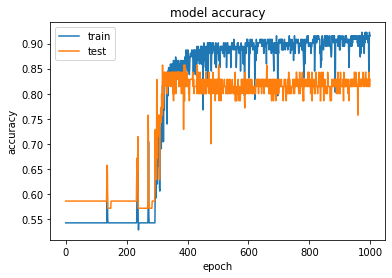

In [36]:


# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



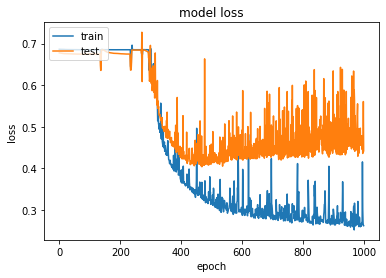

In [37]:


# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

3/3 [==============================] - 0s 4ms/step


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[28, 15],
       [ 7, 41]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)

In [41]:
score

0.7582417582417582

In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.65      0.80      0.72        35
        True       0.85      0.73      0.79        56

    accuracy                           0.76        91
   macro avg       0.75      0.77      0.75        91
weighted avg       0.78      0.76      0.76        91



In [43]:
classifier.get_weights()

[array([[ 0.3211239 , -0.28325525, -0.3918544 ,  0.00536019,  0.5442883 ,
         -0.09759605, -0.16112164,  0.07506073,  0.46893698, -0.14004187,
         -0.0601827 ],
        [-0.6025493 ,  0.6002297 ,  0.18827748,  0.35168895, -0.6250597 ,
         -0.09624708,  0.39850914,  1.0390569 ,  0.18444282,  0.8774994 ,
         -0.12574327],
        [ 0.60403156,  1.4888028 , -0.3159591 , -1.5010251 ,  1.2642192 ,
          0.43550098, -0.37402165, -1.355281  , -1.4515715 , -1.1809003 ,
          0.21156695],
        [ 0.02141114,  0.20671773, -0.32471263, -0.37736464, -0.2239682 ,
         -0.48816013, -0.38057882, -0.09711825,  0.34938267,  0.30634707,
         -0.28398937],
        [ 0.31790933, -0.21661244, -0.03931141,  0.4219495 ,  0.55232847,
         -0.03107047, -0.06838635,  0.14181797, -0.09951162,  0.09181093,
         -0.20272143],
        [-2.104936  , -0.12306858, -0.03255236,  1.6219636 , -1.4152815 ,
         -0.3324834 , -0.12949435,  1.6315415 ,  2.1048977 ,  1.5639029

In [51]:
import joblib
joblib.dump(model_history, 'classmodel.pkl')

INFO:tensorflow:Assets written to: ram://95fd7c33-b269-4cb1-b24c-e41206e957be/assets


['classmodel.pkl']

In [52]:
clf = joblib.load('classmodel.pkl') 

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://7e68f222-0c97-4170-b726-9c6d0e51a5de/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [54]:
from tensorflow.keras.models import load_model
classifier.save('classmodel.h5')
classifier = load_model('resnet50_model.h5')